# Metal Bands Analysis

In this notebook we analyze a kaggle dataset on metal bands, which comes from the following link: https://www.kaggle.com/datasets/mrpantherson/metal-by-nation?select=metal_bands_2017.csv. The dataset contains about 5000 metal bands, the year they were formed, origin, year they split, number of fans from the website this dataset was gathered from, and finally the style of music. The genre of metal is probably the one with the most subgenres, so exploring the style column will be the focus here. 

## Data Wrangling and Cleaning

In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('metal_bands_2017.csv', encoding='latin-1', index_col=0)

In [3]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [4]:
df['band_name'].value_counts()

Iron Maiden          2
Kamelot              2
Helloween            2
Testament            2
Epica                2
                    ..
Alarum               1
Winter               1
Visceral Bleeding    1
Tremonti             1
Axis Of Despair      1
Name: band_name, Length: 4949, dtype: int64

For some reason some of these bands are showing up here twice. Let'see how many and explore if there is duplicate data.

In [5]:
sum(df['band_name'].value_counts() == 2)

51

So there are 51 bands that show up twice. This only can make sense if they broke up and got back together, effectively giving them two startdates. Let's see if this is the case for any of these bands. Bands that this isn't the case should have their duplicate values removed. We can use the formed column to help us here.

In [6]:
sum(df[['band_name', 'formed']].value_counts()==2)

50

So it looks like there is only one band that has different years for the formed column. Let's get rid of all the other duplicates now.

In [7]:
df1 = df.drop_duplicates(subset=['band_name', 'formed'])

Now let's look at the one band left with two rows.

In [8]:
df1['band_name'].value_counts() == 2

Michael Schenker's Temple Of Rock     True
Balance Of Power                     False
Bombs Of Hades                       False
Bloodway                             False
Blood Farmers                        False
                                     ...  
Blitzkrieg                           False
Blackthorn                           False
Beyond Fear                          False
ASP                                  False
Axis Of Despair                      False
Name: band_name, Length: 4949, dtype: bool

In [9]:
df1[df1['band_name'] == 'Michael Schenker\'s Temple Of Rock']

,band_name,fans,formed,origin,split,style
1713,Michael Schenker's Temple Of Rock,25,1979,Germany,1979,Hard rock
4734,Michael Schenker's Temple Of Rock,1,2011,Germany,-,"Heavy,Hard rock"


After doing some quick google searches, this band doesn't have much information, and the number of fans in the second appearence here is only 1. With these being true, let's just get rid of its second appearence for easier analysis.

In [10]:
df2 = df.drop_duplicates(subset=['band_name'])

Now let's look at null values.

In [11]:
#since we dropped some rows we need to reset the index
df2.reset_index(drop=True, inplace=True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4949 non-null   object
 1   fans       4949 non-null   int64 
 2   formed     4949 non-null   object
 3   origin     4941 non-null   object
 4   split      4949 non-null   object
 5   style      4949 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.1+ KB


In [13]:
df2[df2['origin'].isna() == True]

,band_name,fans,formed,origin,split,style
410,Enshine,175,2009,NaN,-,Gothic doom
939,Clouds,61,2013,NaN,2013,Atmospheric doom
1372,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2564,Twilight Of The Gods,11,2010,NaN,-,Heavy
2946,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3394,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3891,Level 10,3,2014,NaN,2014,"Heavy,Power"
4151,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


After some googling, it turns out Enshine is from Sweden. There are multiple bands named Clouds, but none that started in 2013, so unfortunately the origin data can't be found. Subterranean Masquerade is from Israel. Twilight Of The Gods has multiple places of origin. Let's do a value count and pick the one that shows up the most. The choices for this band are: Sweden / Norway / Ireland / United Kingdom.

In [14]:
 df2['origin'].value_counts()

USA                          1123
Sweden                        469
Germany                       392
United Kingdom                339
Finland                       300
                             ... 
Australia, United Kingdom       1
Sweden, Finland                 1
Hungary, United Kingdom         1
Colombia, USA                   1
Greenland                       1
Name: origin, Length: 113, dtype: int64

Okay, so we will simply say that Twilight Of The Gods is from Sweden. Next is Archivist, which also has many places of origin, but most of the members are from Austria, so we will put that. Metallic Taste Of Blood has multiple places of origin as well, one of which is the USA, which has the most occurences so we will add this to that. The same thing is true for Level 10 as well. Death Penalty has only two places of origin, one being Belgium and the other being the UK. We will select the UK because it has more occurences. 

Now we can fix this dataset by adding all these values, although we will just delete the row with the band Clouds since its origin is unknown and it is only one band.

In [15]:
df2.iloc[410, 3] = 'Sweden'
df2.iloc[1372, 3] = 'Israel'
df2.iloc[2564, 3] = 'Sweden'
df2.iloc[2946, 3] = 'Austria'
df2.iloc[3394, 3] = 'USA'
df2.iloc[3891, 3] = 'USA'
df2.iloc[4151, 3] = 'United Kingdom'

In [16]:
df2 = df2[df2['band_name'] != 'Clouds']

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4948
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4948 non-null   object
 1   fans       4948 non-null   int64 
 2   formed     4948 non-null   object
 3   origin     4948 non-null   object
 4   split      4948 non-null   object
 5   style      4948 non-null   object
dtypes: int64(1), object(5)
memory usage: 270.6+ KB


Some values in the formed column are also just a '-' sign. This is like a null value, but below you can see there are only 4 of them with not many fans so let's just remove them.

In [18]:
df2[df2['formed'] == '-']

,band_name,fans,formed,origin,split,style
4392,Throes Of Sanity,2,-,USA,-,Us power
4549,Doomocracy,1,-,Greece,-,Doom
4770,Rustless,1,-,Italy,-,Heavy
4897,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


In [19]:
df2 = df2[df2['formed'] != '-']

#reset index again
df2.reset_index(drop=True, inplace=True)

So now we have no null values. The final cleaning step is to look at the split column. From the rows that we have seen so far, there seem to be an oddly large number of bands that formed and split in the same year. Let's explore how many.

In [20]:
df2[df2['formed'] == df2['split']]

,band_name,fans,formed,origin,split,style
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
5,Slayer,2955,1981,USA,1981,Thrash
7,Dream Theater,2329,1985,USA,1985,Progressive
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"
...,...,...,...,...,...,...
4935,Argus (Ro),0,1996,Romania,1996,Black
4937,As I Lay Dying (AUT),0,1991,Austria,1991,"Death,Melodic doom"
4939,Atara,0,2006,France,2006,"Black,Grindcore"
4941,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"


About half of the data has this issue it seems. One can notice some popular bands here, like Megadeth and Slayer, who certainly did not split apart the same year they formed. The split column is probably not going to be useful as it stands, and there are too many datapoints to address individually here if we were to fix the problem manually. Let's just drop the column for now then.

In [21]:
df3 = df2.drop(columns = ['split'])
df3.head(3)

,band_name,fans,formed,origin,style
0,Iron Maiden,4195,1975,United Kingdom,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,"Heavy,Bay area thrash"


## Data Exploration

In [22]:
df3['style'].value_counts()

Black                                         345
Death                                         249
Heavy                                         179
Power                                         146
Progressive                                   144
                                             ... 
Progressive,Psychedelic rock                    1
Progressive,Ambient                             1
Depressive black,Post-metal                     1
Atmospheric black,Drone doom,Neofolk,Noise      1
Avantgarde death                                1
Name: style, Length: 1227, dtype: int64

In [23]:
df3 = df3.astype({'formed': int})

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4944 non-null   object
 1   fans       4944 non-null   int64 
 2   formed     4944 non-null   int32 
 3   origin     4944 non-null   object
 4   style      4944 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 173.9+ KB


In [24]:
df_temp = df3[['formed', 'fans']]

#grouping the total number of fans by decade, with some help from:
#https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade
fans_df = pd.Series(df_temp.groupby((df_temp['formed']//10)*10).sum()['fans'])

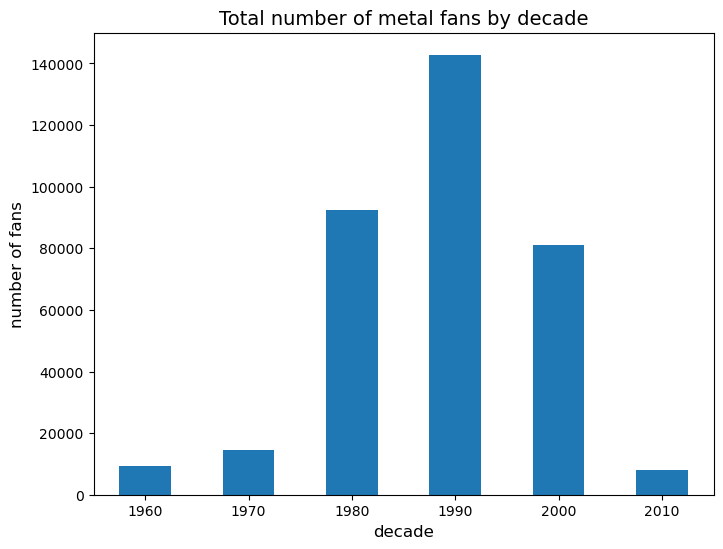

In [25]:
plt.rcParams["figure.figsize"] = (8, 6)

fans_df.plot.bar(rot=0)
plt.title('Total number of metal fans by decade', size=14)
plt.xlabel('decade', size=12)
plt.ylabel('number of fans', size=12)
plt.show()

In [26]:
df_temp2 = df3[['formed', 'style']]

df_temp2.groupby((df_temp2['formed']//10)*10).count()

,formed,style
formed,,
1960,16,16
1970,84,84
1980,504,504
1990,1412,1412
2000,2192,2192
2010,736,736


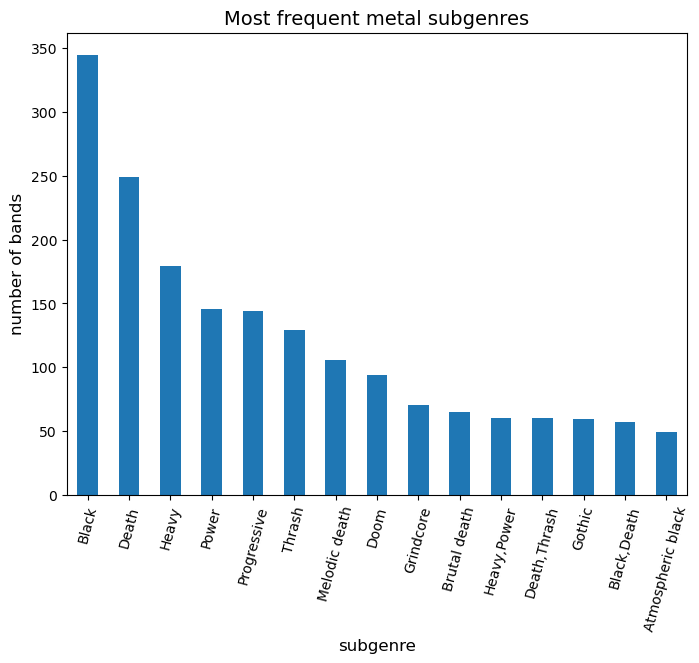

In [27]:
df3['style'].value_counts()[0:15].plot.bar(rot=75)
plt.xlabel('subgenre', size=12)
plt.ylabel('number of bands', size=12)
plt.title('Most frequent metal subgenres', size=14)
plt.show()

So you can see after the 10 or so most popluar subgenres, the rest of the genres start to become mixes of multiple genres, or just weird sub-subgenres (other unique subgenres will be insignificant). Let's get these bands that have more than one genre or subgenre, and add them to the main sub genres, which would be the top ten here, going from Black metal to Brutal Death metal. These account for a lot of the data, so we will be adding a lot here. We will also allow a band that is two subgenres to be added to both. 

Note for Black, some genres start with the word Blackened, which is typically a subgenre of black metal, so we will let these get couunted towards black metal bands. Naturally, melodic death metal is a subgenre of death metal, so we can drop that style here.

In [97]:
#df3[df3['style'].str.contains('Nu')]

In [69]:
#this is a function that counts the total number of occurences of each style, including subgenres
def style_count(band_name, df):
    #just check if the string contains the style type, to get subgenres
    return sum(df['style'].str.contains(band_name)) 

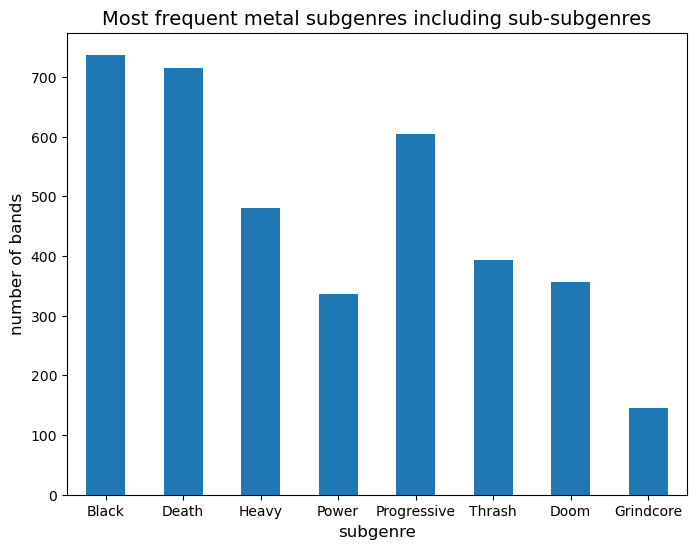

In [70]:
#now we can use the function to get the actual total couunt of every subgenre
freq_dict = {'Black': style_count('Black', df3), 
             'Death': style_count('Death', df3), 
             'Heavy': style_count('Heavy', df3), 
             'Power': style_count('Power', df3), 
             'Progressive': style_count('Progressive', df3), 
             'Thrash': style_count('Thrash', df3), 
             'Doom': style_count('Doom', df3), 
             'Grindcore': style_count('Grindcore', df3)}

pd.Series(data=freq_dict).plot.bar(rot=0)
plt.xlabel('subgenre', size=12)
plt.ylabel('number of bands', size=12)
plt.title('Most frequent metal subgenres including sub-subgenres', size=14)
plt.show()

It is interesting to see that black and death metal are the most common. One might expect Heavy metal to be the most common because that is what most people would consider 'regular metal'. **A hypothesis would be that: Heavy metal was the most prevalent subgenre in the 60's and 70's, and then thrash mostly in the 80's and 90's, when the big four (Metallica, Megadeth, Anthrax, Slayer) were the most popular. And finally Black and Death metal grew in popularity in the 90's and onward, along with the other genres.**

In the first plot, we will just explore these four subgenres. The others we will explore later.

In [76]:
#now create a column for each decade for easier grouping
df3['decade'] = (df3['formed']//10)*10
df3.head(3)

,band_name,fans,formed,origin,style,decade
0,Iron Maiden,4195,1975,United Kingdom,"New wave of british heavy,Heavy",1970
1,Opeth,4147,1990,Sweden,"Extreme progressive,Progressive rock,Progressive",1990
2,Metallica,3712,1981,USA,"Heavy,Bay area thrash",1980


In [92]:
#We need to get the number of bands with a certain style per decade
def freq_count_by_decade(subgenre, df):
    freq_lst = []
    
    #our dataset only has bands from 1960's to 2015, so we know the range of decades from this
    for decade in np.arange(1960, 2020, 10):
        freq_lst.append(style_count(subgenre, df[df['decade'] == decade]))
        
    return freq_lst

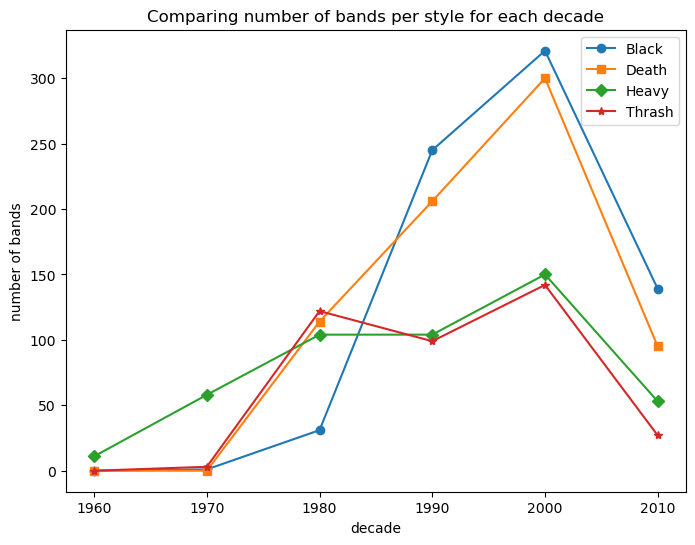

In [244]:
decade_range = np.arange(1960, 2020, 10)

plt.plot(decade_range, freq_count_by_decade('Black', df3), label = 'Black', marker='o')
plt.plot(decade_range, freq_count_by_decade('Death', df3), label = 'Death', marker='s')
plt.plot(decade_range, freq_count_by_decade('Heavy', df3), label = 'Heavy', marker='D')
plt.plot(decade_range, freq_count_by_decade('Thrash', df3), label = 'Thrash', marker='*')
plt.legend()
plt.xlabel('decade')
plt.ylabel('number of bands')
plt.title('Comparing number of bands per style for each decade')
plt.show()

So not quite in line with the hypothesis. It seems Heavy and thrash metal are more in line with each other, and the same for black and death metal. Although, Heavy metal was still the starting point in the 1960's, and kept growing, thrash metal first came to prominence in the 1980's. This is in line with the hypothesis, as that is when the big four started their careers, and were the first and most popular thrash metal bands. 

Growth for both of these styles plateaued after that, which makes sense as the 1990's and 2000's were when black and death metal grew in popularity. You can see Death metal first started growing in the 1980's though, which makes sense because when the subgenre was still forming it was mostly just more aggresive thrash metal with screaming. A notable band here would be 'Death'. Black metal started forming in the 1990's, and grew in more popularity than death metal due to its anti-christian message and more extreme Kiss-like imagery. This is why Black metal has the most number of bands here. 

Let's look at the other styles now.

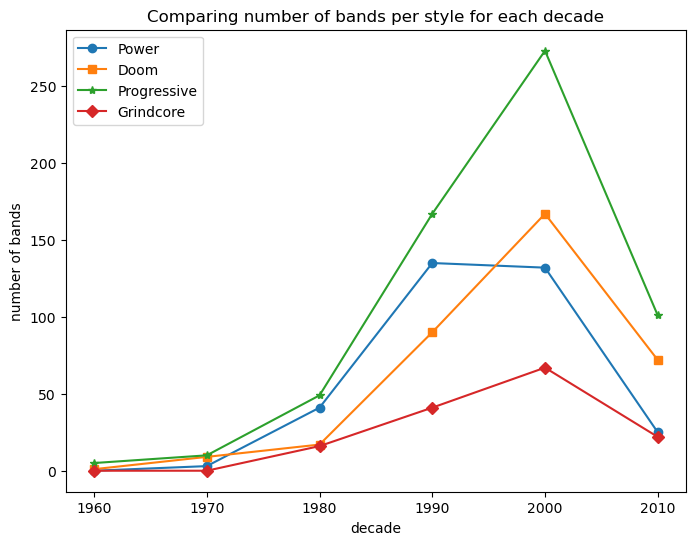

In [245]:
plt.plot(decade_range, freq_count_by_decade('Power', df3), label = 'Power', marker='o')
plt.plot(decade_range, freq_count_by_decade('Doom', df3), label = 'Doom', marker='s')
plt.plot(decade_range, freq_count_by_decade('Progressive', df3), label = 'Progressive', marker='*')
plt.plot(decade_range, freq_count_by_decade('Grindcore', df3), label = 'Grindcore', marker='D')
plt.legend()
plt.xlabel('decade')
plt.ylabel('number of bands')
plt.title('Comparing number of bands per style for each decade')
plt.show()

Unsurprisingly, these subgenres peaked in the number of bands in the 1990's and 2000's alongside Black and Death metal. One obvious thing to note though is that the Progressive metal style grew almost as popular as Black and Death metal. Progressive metal is a fusion of progressive rock and metal, so a mix of genres, though not a mix of multiple metal genres (hence why we kept it as its own subgenre). Popular bands at the time were dream theatre, or Opeth, which is probably why it grew in popularity as much as we are seeing here.

Note that the data only goes up to 2015, so the last decade's value should be taken with a grain of salt. 

Let's now see if the total number of fans follow these trends.

In [135]:
#this function gets the total number of fans per decade
def fans_sum(style, df):
    #we will return a list of the sums per decade
    fans_sum_lst = []
    
    for decade in np.arange(1960, 2020, 10):
        #filter by decade
        df_dec = df[df['decade'] == decade]
        #now filter by style
        df_style_dec = df_dec[df_dec['style'].str.contains(style)]
        #now we can take the sum
        fans_sum_lst.append(sum(df_style_dec['fans']))
        
    return fans_sum_lst        

In [233]:
#let's plot the number of fans on the same plot as the number of bands per decade, to see how the trends compare.
def comparison_plot(style, df):
    fig, ax = plt.subplots()
    
    p1 = ax.plot(decade_range, freq_count_by_decade(style, df), color = 'blue', label = 'number of bands', marker='o')
    ax.set_xlabel("decade", fontsize = 12)
    ax.set_ylabel("number of bands", fontsize=12, color = 'blue')
    ax.set_title('Comparing number of fans to number of bands by {} metal subgenre'.format(style), fontsize=14)

    #twinx allows another y axis on the right side of the plot
    ax2 = ax.twinx()
    p2 = ax2.plot(decade_range, fans_sum(style, df), color='red', label = 'number of fans', marker='s')
    ax2.set_ylabel("number of fans", fontsize=12, color = 'red')

    #burrowed following code from this link, which get one single legend for both of these plots
    #https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
    ps = p1+p2
    labs = [p.get_label() for p in ps]
    ax.legend(ps, labs, loc=0)
    
    plt.show()


Before we look at these plots, I would suspect that the number of fans will peak right before the number of bands peaks. This is because there probably would be a delay in new bands starting of certain styles. More specifically, **the second hypothesis is: the number of fans of a certain genre will peak at some time period, so then as those new fans will start bands of that style soon, but perhaps not immediately. This will cause a rise in the number of bands in the following decade, when the number of fans would decrease by then.**

If this doesn't happen, then they should probably just peak at the same time. (Although, it may have been better to look at these plots every 5 years instead of 10)

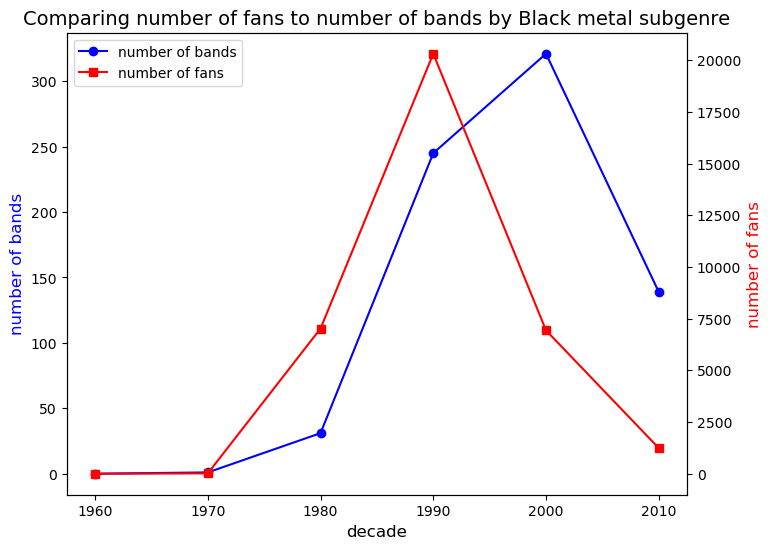

In [234]:
comparison_plot('Black', df3)

So indeed the number of fans peaked right before the number of bands did. This may be why there is a huge drop off in the number of bands in the 2010's. Although again, the decade of 2010 only goes up to 2015, from anecdotal experience, Black metal has not been very popular lately at all, so this downward trend is seemingly only going to continue. Also the website that was scraped to get this dataset is not very popular, and potentially getting even less popular, so 2010 data may not provide very useful information.

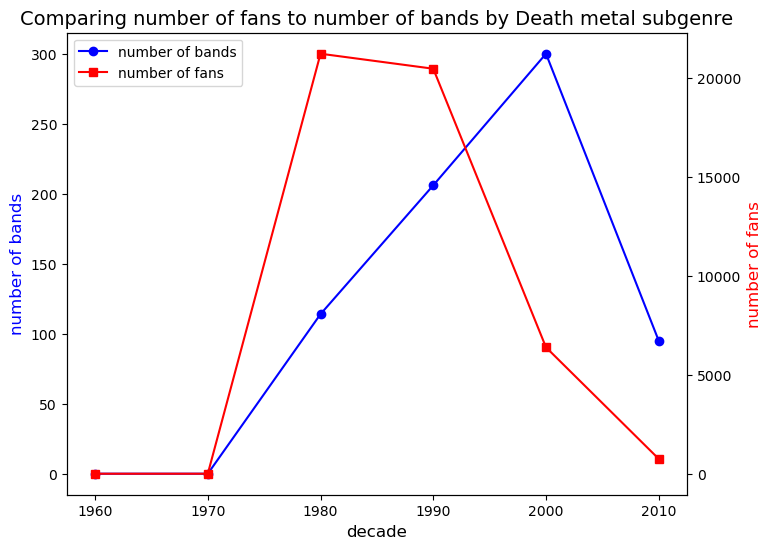

In [235]:
comparison_plot('Death', df3)

This subgenre is interesting because the number of fans peaked and essentially stayed peaked for another decade. The number of bands then only increased to follow this trend, but after this the same thing happened and the number of bands dropped off right after the number of fans did.

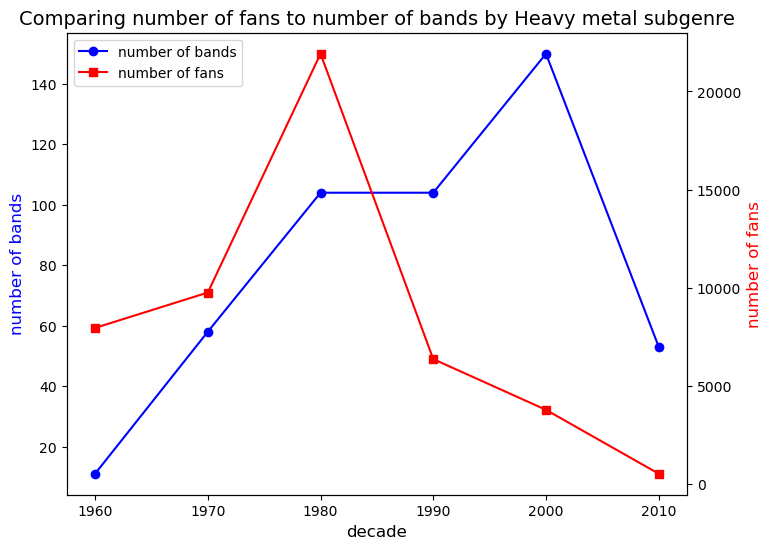

In [236]:
comparison_plot('Heavy', df3)

There seems to be a delay in the number of bands decreasing after the number of fans did, but the second hypothesis still continues to be true.

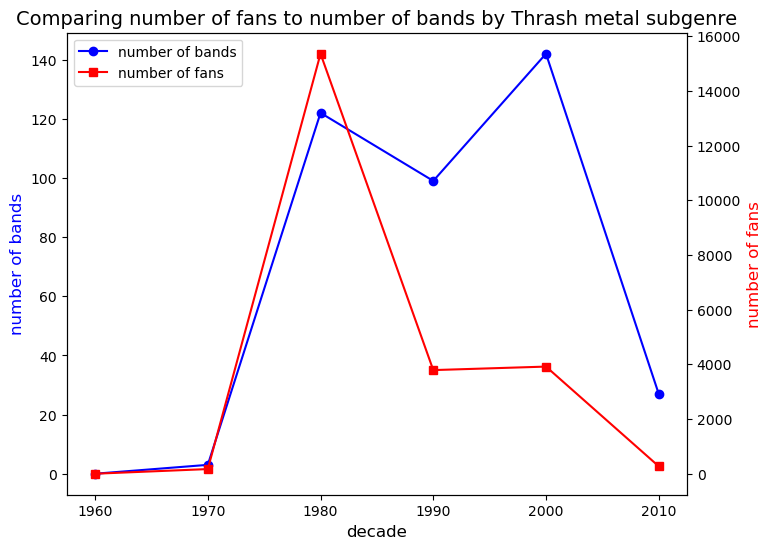

In [237]:
comparison_plot('Thrash', df3)

Same thing happened as with Heavy metal. These two styles coincided from the above plots when comparing the number of bands per style against each decade against each other, so this makes sense.

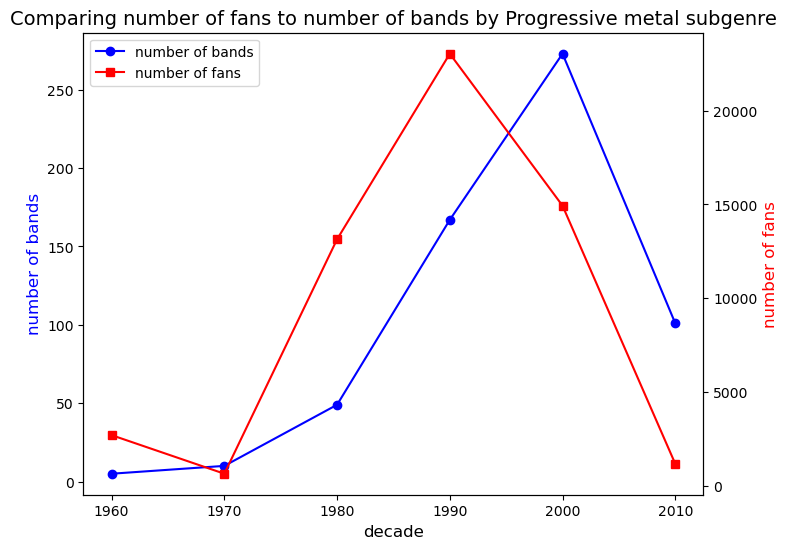

In [238]:
comparison_plot('Progressive', df3)

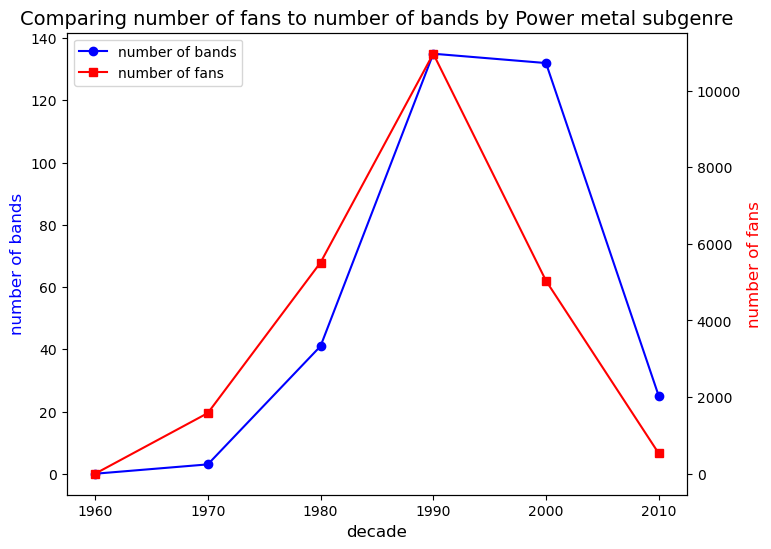

In [239]:
comparison_plot('Power', df3)

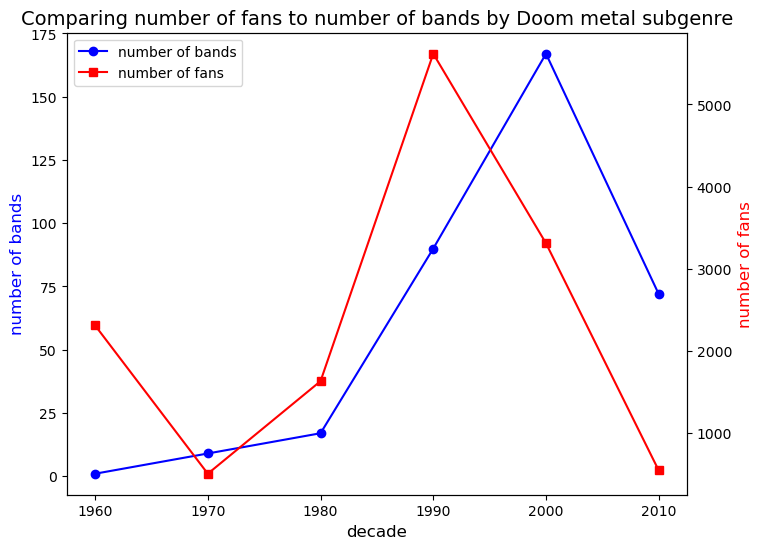

In [240]:
comparison_plot('Doom', df3)

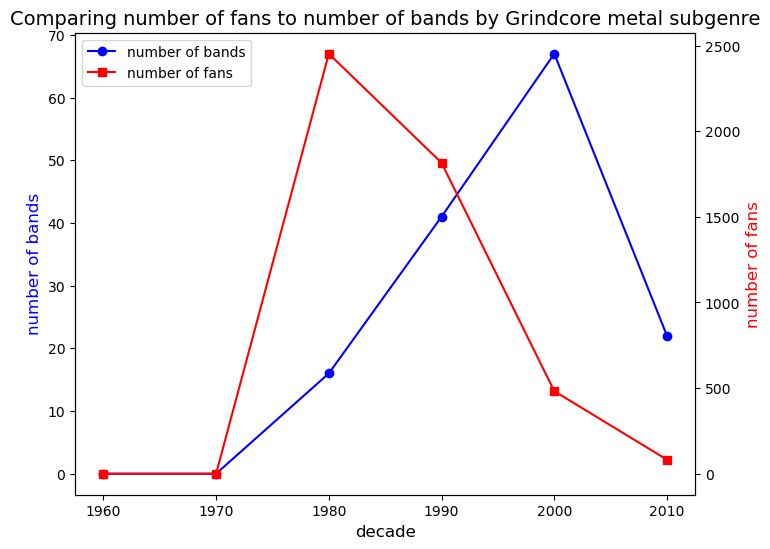

In [241]:
comparison_plot('Grindcore', df3)

These last four plots seem to follow this hypothesis close enough as well, with similar trends that we've already seen.

Thus, it does seem like the hypotheses presented were true mostly, in that while in the 60's, 70's, and 80's, metal was overall not that popular, heavy metal was the most popular style. And then Black and Death metal, along with the other subgenres, rose in popularity in the 90's and early 2000's. And then, while the data past 2010 is not complete, it does seem like all metal subgenres are decerasing in popularity. 

The only thing in the hypotheses that were not true is that thrash metal followed suit with Heavy metal, and not with any of the other subgenres.